Titanic Dataset - Exploratory Data Analysis

Performing EDA on the Kaggle Titanic dataset. It includes exploring missing values, distributions, and relationships between features and survival.

In [2]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

df.isnull().sum()


/tmp/ipython-input-1268156494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1268156494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


/tmp/ipython-input-2760406247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette="Set2")


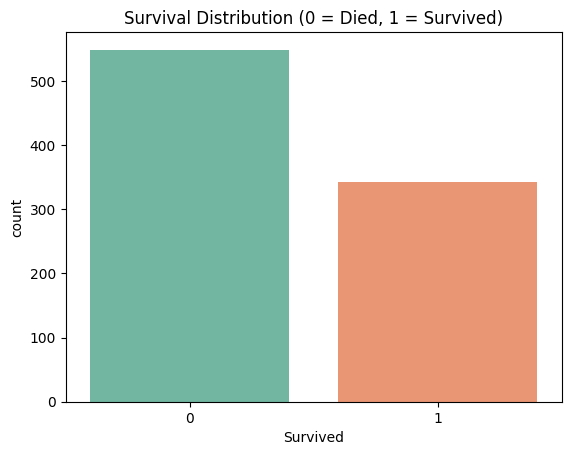

In [5]:
#survived visualization in training data
sns.countplot(x='Survived', data=df, palette="Set2")
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()


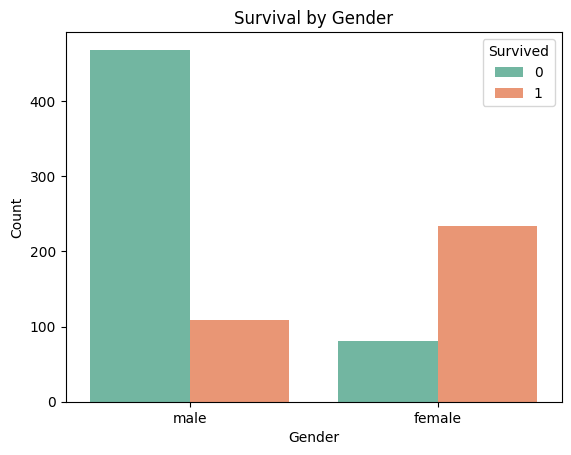

Survival Rate by Gender:
Sex
female    0.74
male      0.19
Name: Survived, dtype: float64


In [7]:
#survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df, palette="Set2")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean().round(2))


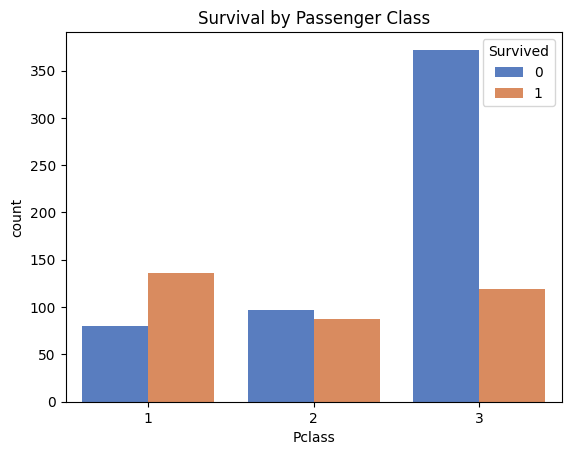

Survival Rate by Class:
Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64


In [8]:
#survival rate by class(first class, second class or third class)
sns.countplot(x='Pclass', hue='Survived', data=df, palette="muted")
plt.title("Survival by Passenger Class")
plt.show()

print("Survival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean().round(2))


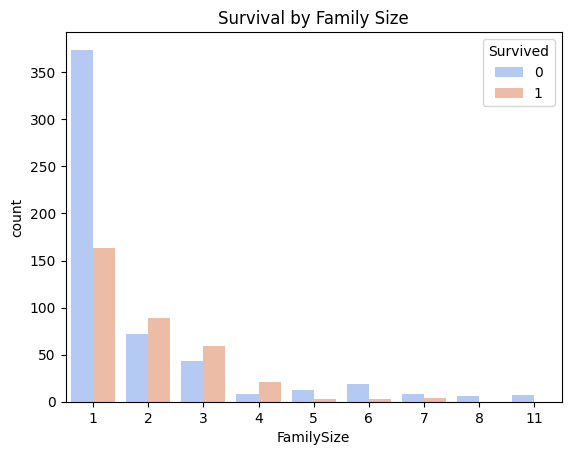

Survival Rate by Family Size:
FamilySize
1     0.30
2     0.55
3     0.58
4     0.72
5     0.20
6     0.14
7     0.33
8     0.00
11    0.00
Name: Survived, dtype: float64


In [9]:
#survival rate by family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df, palette="coolwarm")
plt.title("Survival by Family Size")
plt.show()

print("Survival Rate by Family Size:")
print(df.groupby('FamilySize')['Survived'].mean().round(2))


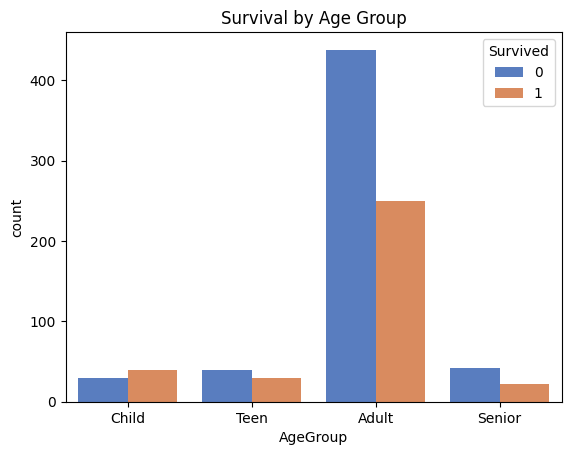

Survival Rate by Age Group:
AgeGroup
Child     0.58
Teen      0.43
Adult     0.36
Senior    0.34
Name: Survived, dtype: float64


/tmp/ipython-input-1346850459.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean().round(2))


In [10]:
#survival rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,50,80], labels=['Child','Teen','Adult','Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=df, palette="muted")
plt.title("Survival by Age Group")
plt.show()

print("Survival Rate by Age Group:")
print(df.groupby('AgeGroup')['Survived'].mean().round(2))


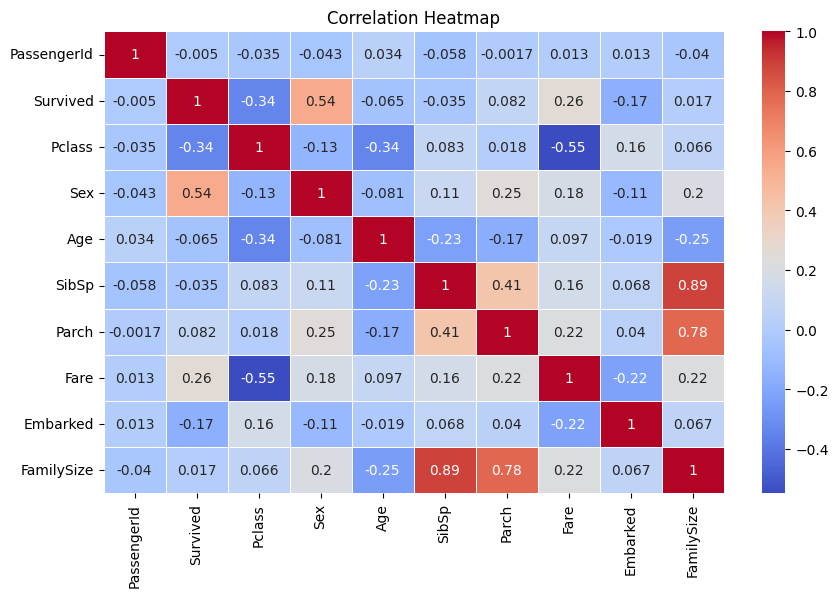

In [12]:
# Encode categorical variables
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male':0,'female':1})
df_corr['Embarked'] = df_corr['Embarked'].map({'C':0,'Q':1,'S':2})

# Drop non-numeric columns
df_corr = df_corr.drop(columns=['Name','Ticket','AgeGroup'])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Key Insights:**

Females had higher survival chances than males.

First-class passengers survived more often than 2nd/3rd class.

Younger passengers had slightly higher survival rates.

Higher fares correlate with survival probability.